This is my attempt at using the titanic data set, which can be found on Kaggle or online, to produce a machine learning model that predicts whether a passenger on the titanic survived(1) or did not survive(0). The first part of the project will be data visualisation and cleaning. This will allow me to be able to get a better understanding of which features I should use. 
First, we import the required modules and of course the data that we will require. We will be importing the training data of course to explore possible relationships. 

<BarContainer object of 3 artists>

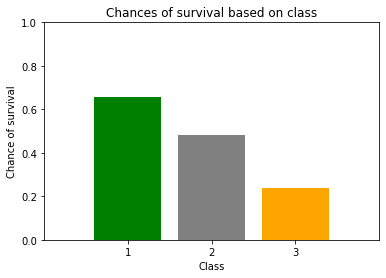

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


file_location = 'source'
df = pd.read_csv (file_location) 
# df = df.set_index(['PassengerId'])  # Set the index to Passenger ID as it is unique. Never mind this was not a good idea
df = df[df['Age'].notna()] #get rid of the rows for age that have NaN in them 
df = df.rename(columns = {'Pclass': 'class', 'SibSp': 'sib_spouses', 'Parch': 'parents_children'})
df = df.drop(columns = ['Name', 'Ticket']) #name not really so important to us. ticket number also not so important 
class_survival = df.groupby(['class']).mean()
class_survival.drop(columns = ['sib_spouses', 'parents_children']) #telling us that the probability of survival in first class, second class, etc. is as shown below. And the average age also of each  
#person in each class. 
class_survival = class_survival.reset_index()
bar_chart_y_plot = class_survival['Survived']
bar_chart_x_plot = [1,2,3]
plt.title('Chances of survival based on class')
plt.xlabel('Class')
plt.ylabel('Chance of survival')
plt.ylim([0,1])
plt.xlim([0,4])
plt.xticks(bar_chart_x_plot, (1,2,3))
plt.bar(bar_chart_x_plot, bar_chart_y_plot, color = ['Green', 'Gray', 'Orange'])
# Clearly higher class = more likely to survive

<AxesSubplot:xlabel='class', ylabel='Survived'>

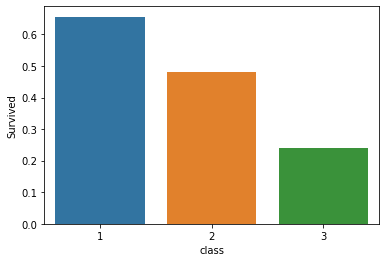

In [2]:
class_survival
sns.barplot(x = 'class', y = 'Survived', data = class_survival)

(0.0, 1.0)

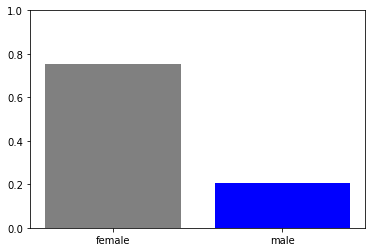

In [3]:
df_Sex = df.reset_index()
df_Sex
df_Sex = df_Sex.drop(columns= ['PassengerId','sib_spouses', 'parents_children', 'Cabin', 'Fare', 'Embarked', 'Age'])
df_Sex
#df_Sex.Sex =  df_Sex.Sex.map({'male': 1, 'female': 0})
df_Sex_plot_data = df_Sex.groupby(['Sex']).mean().reset_index()
df_Sex_plot_data
plt.bar(df_Sex_plot_data['Sex'], df_Sex_plot_data['Survived'], color = ['Gray', 'Blue'])
plt.ylim([0,1])
# the plot is clearly showing that women were are a lot more likely to survive than were men 


In [4]:
df.groupby(['Sex']).mean() # so we see that the chance of survival for females was significantly higher than that of males 
df.groupby(['Sex', 'class']).mean() # we see that the chance of survival of a female in first class is nearly 6x as high as a male in 3rd class.  
#Chances of survival for adults 
df[df['Age'] > 18].groupby(['Sex', 'class']).mean() #so this is interesting. First class and second class: females quite likely to survive. But male in 3rd class 
#more likely to survive than male in 2nd class... why? 
df[df['Age'] < 18].groupby(['Sex', 'class']).mean() #Ok so looks like it is a very high chance of survival for children, unless they are in 3rd class. 


PassengerId  Survived        Age  sib_spouses  parents_children  \
Sex    class                                                                    
female 1       525.375000  0.875000  14.125000     0.500000          0.875000   
       2       369.250000  1.000000   8.333333     0.583333          1.083333   
       3       374.942857  0.542857   8.428571     1.571429          1.057143   
male   1       526.500000  1.000000   8.230000     0.500000          2.000000   
       2       527.818182  0.818182   4.757273     0.727273          1.000000   
       3       437.953488  0.232558   9.963256     2.069767          1.000000   

                    Fare  
Sex    class              
female 1      104.083337  
       2       26.241667  
       3       18.727977  
male   1      116.072900  
       2       25.659473  
       3       22.752523

In [5]:
df[(df['Age'] > 18)].groupby(['Sex', 'class']).mean() #so for those older than 18, women more likely to survive. 
# the statistic about being 2nd class and male is interesting as survival chance lower than male and 3rd class. General trend follows that of <18.

PassengerId  Survived        Age  sib_spouses  parents_children  \
Sex    class                                                                    
female 1       470.972973  0.972973  37.500000     0.527027          0.418919   
       2       454.566667  0.900000  33.158333     0.500000          0.500000   
       3       402.779661  0.423729  30.161017     0.440678          0.983051   
male   1       448.239583  0.375000  42.901042     0.364583          0.270833   
       2       443.559524  0.071429  34.750000     0.345238          0.154762   
       3       456.356436  0.133663  30.366337     0.158416          0.099010   

                    Fare  
Sex    class              
female 1      105.043469  
       2       21.224653  
       3       14.785453  
male   1       68.877389  
       2       20.219593  
       3       10.022624

<BarContainer object of 8 artists>

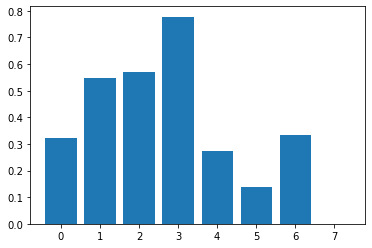

In [6]:
df['Family_numb'] = df.apply(lambda row: row.sib_spouses + row.parents_children, axis = 1)

df_family = df.reset_index().drop(columns= ['parents_children', 'Embarked', 'Cabin', 'Fare', 'sib_spouses', 'class', 'PassengerId'])
family_plot = df_family.groupby(['Family_numb']).mean()
family_plot = family_plot.reset_index()
family_plot
plt.bar(family_plot['Family_numb'], family_plot['Survived']) #what this mean cos it could mean lot of thigns? is it that family more or less likely to survive?

In [7]:
df # next step: separate age into bins and see which one most likely to survive 
# also - look at fare and cabin and also loc of dept. 
# also get rid of sib and parents _children and one of the family ones.... 
#and better graphs that aren't just bar charts .....

,PassengerId,Survived,class,Sex,Age,sib_spouses,parents_children,Fare,Cabin,Embarked,Family_numb
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,NaN,Q,5
886,887,0,2,male,27.0,0,0,13.0000,NaN,S,0
887,888,1,1,female,19.0,0,0,30.0000,B42,S,0
889,890,1,1,male,26.0,0,0,30.0000,C148,C,0


<AxesSubplot:xlabel='Age', ylabel='Count'>

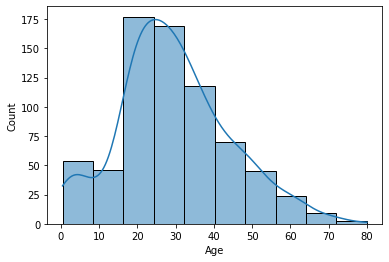

In [8]:
df['Age']
#plt.hist(df['Age'], bins = 10)
sns.histplot(df['Age'], bins = 10, kde = True) # so quite clearly the older you are after the age of about 40 you are less likely to survive. 
#Looks like whilst children were saved, younger adults were most likely to survive.  

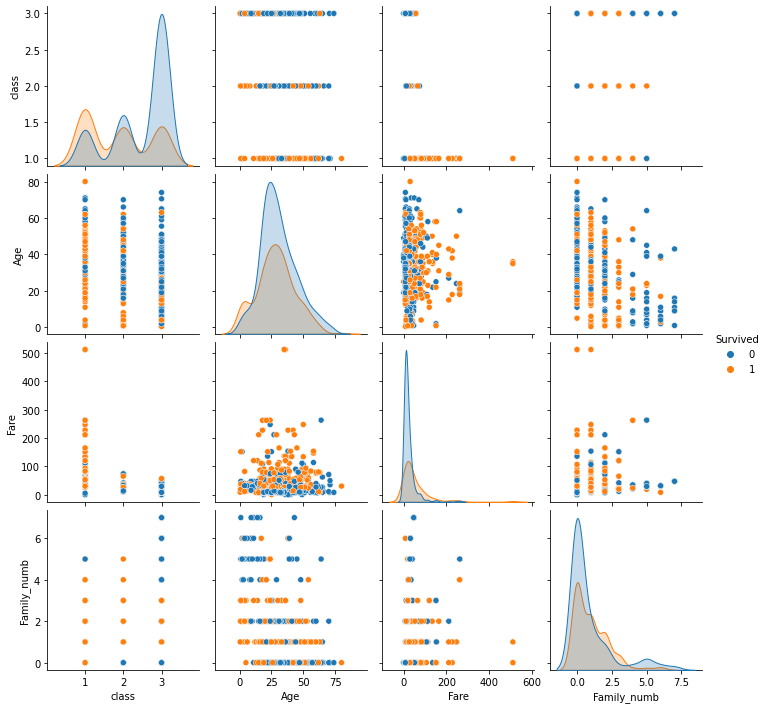

In [9]:
df = df.drop( columns= ['PassengerId', 'sib_spouses', 'parents_children'])
sns.pairplot(df, hue = 'Survived') # get a better idea of all of the potential relationships. 

In [10]:
df.drop(columns = ['Survived']).groupby(['Embarked']).median() # let's check if Location of Dept has something to do with class.
#looks like those in C are higher class than Q and S (on average)
#now check if C has higher chance of survival - probably do
# to graphically represent need to find a way to count the number of times that a certain class comes up....? however seems quite likely 
# that there is a correlation between class and location of where they embarked from ... 

,class,Age,Fare,Family_numb
Embarked,,,,
C,1,29.0,36.2521,1
Q,3,27.0,7.7500,0
S,3,28.0,13.0000,0


In [11]:
df.groupby(['Embarked']).mean()

,Survived,class,Age,Fare,Family_numb
Embarked,,,,,
C,0.607692,1.746154,30.814769,68.296767,0.838462
Q,0.285714,2.785714,28.089286,18.265775,1.142857
S,0.362816,2.328520,29.445397,27.476284,0.962094


In [12]:
df = df.rename(columns={'class':'Class'})
df['class_embarked'] = df['Class'].map(str) + df['Embarked'] # convert class to a string and then it is just like normal python 
df.groupby(['class_embarked']).mean() # probably should have just left it as groupby as that is a little bit easier to read

,Survived,Class,Age,Fare,Family_numb
class_embarked,,,,,
1C,0.716216,1.0,38.027027,108.246399,0.756757
1Q,0.500000,1.0,38.500000,90.000000,1.500000
1S,0.611111,1.0,38.152037,74.172415,0.935185
2C,0.533333,2.0,22.766667,26.811947,1.266667
2Q,0.500000,2.0,43.500000,12.350000,0.000000
2S,0.474359,2.0,30.386731,21.075000,0.801282
3C,0.439024,3.0,20.741951,11.369927,0.829268
3Q,0.250000,3.0,25.937500,12.780904,1.208333
3S,0.210345,3.0,25.696552,13.529451,1.058621


<AxesSubplot:xlabel='Survived', ylabel='count'>

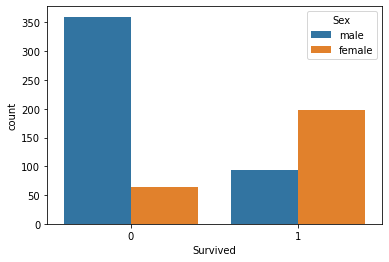

In [13]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

Ok, so having done all of this, it seems that class, age and sex are the most important features. And that being higher class is correlating with embarking from C and having a higher fare and a higher chance of survival.... these are probably interlinked however. 

In [14]:
a = [col for col in df.columns if df[col].isnull().any()]
a
df.isnull().sum() # looks like we have a lot of null in the cabin, a few in embarked. There are actually only
df.shape

(714, 9)

In [15]:
training = pd.read_csv (file_location) 
training.isna().sum() # am just going to remove the cabin column for now
training = training.drop(['Cabin'], axis = 1)
training.isna().sum() # ok so let's impute the age. Will use median of overall ages. 
training.mean(skipna = True) # Average age is about 29.699 so will use that to impute missing Age's


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [16]:
training = pd.read_csv(file_location)
training.isna().sum()
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
training_model = training.drop( ['Cabin', 'Ticket', 'Name', 'PassengerId'], axis = 1) 
categorical_training = training_model.select_dtypes(include = ['object'])
categorical_training.columns.tolist()


['Sex', 'Embarked']

In [18]:
categorical_cols_empty = categorical_training.columns[categorical_training.isnull().any()]
from sklearn.impute import SimpleImputer # for categorical missing values have used categorical imputer - probably not best practice though
categorical_imputer = SimpleImputer(missing_values= np.NaN, strategy = 'most_frequent')
for feature in categorical_cols_empty: 
    categorical_training[feature] = categorical_imputer.fit_transform(categorical_training[feature].values.reshape(-1,1))
    training [feature] = categorical_imputer.fit_transform(categorical_training[feature].values.reshape(-1,1))

training['Age'].describe()
np.random.seed(1)
training['Age'].fillna(np.random.randint(20,38), inplace = True)
training.info()
numerical_imputer = SimpleImputer(missing_values = np.NaN, strategy= 'most_frequent')
training_model['Age'] = numerical_imputer.fit_transform(training_model['Age'].values.reshape(-1,1))
training_model
training_model.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ipython-input-18-8cbd141f31b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_training[feature] = categorical_imputer.fit_transform(categorical_training[feature].values.reshape(-1,1))


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [19]:
training_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [20]:
X_train

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
X_train = training_model.copy()
cols = ['Sex', 'Embarked']
X_train['Embarked'] = ordinal_encoder.fit_transform(training_model[cols])
#training_model['Embarked'] = ordinal_encoder.fit_transform(training_model['Embarked'])


In [ ]:
X_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,2.0
1,1,1,female,38.0,1,0,71.2833,1.0
2,1,3,female,26.0,0,0,7.925,1.0
3,1,1,female,35.0,1,0,53.1,1.0
4,0,3,male,35.0,0,0,8.05,2.0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,2.0
887,1,1,female,19.0,0,0,30.0,1.0
888,0,3,female,24.0,1,2,23.45,1.0
889,1,1,male,26.0,0,0,30.0,2.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[cols]))
training_model


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.25,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.925,0,0,1
3,1,1,0,35.0,1,0,53.1,0,0,1
4,0,3,1,35.0,0,0,8.05,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0,0,0,1
887,1,1,0,19.0,0,0,30.0,0,0,1
888,0,3,0,24.0,1,2,23.45,0,0,1
889,1,1,1,26.0,0,0,30.0,1,0,0


In [ ]:
OH_cols_train

,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...
886,0.0,0.0,1.0,0.0,0.0,1.0
887,0.0,1.0,0.0,0.0,1.0,0.0
888,0.0,1.0,0.0,0.0,1.0,0.0
889,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
cleanup_nums = {"Sex": {"male": 1, "female": 0}}
training_model= training_model.replace(cleanup_nums)

In [ ]:

training_model.isna().sum()
training_model # have to do either ordinal encoding or one hot encoding - will do One Hot
training_model['Age']
training_model


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.25,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.925,0,0,1
3,1,1,0,35.0,1,0,53.1,0,0,1
4,0,3,1,35.0,0,0,8.05,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0,0,0,1
887,1,1,0,19.0,0,0,30.0,0,0,1
888,0,3,0,24.0,1,2,23.45,0,0,1
889,1,1,1,26.0,0,0,30.0,1,0,0


In [ ]:

training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [ ]:
y = training_model['Survived']
X = training_model.drop(['Survived'],1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
lr = LogisticRegression(max_iter = 2000, penalty = 'l2')
model1 = lr.fit(x_train, y_train)
lrpred = lr.predict(x_test)
displr = plot_confusion_matrix(lr, x_test, y_test, cmap = plt.cm.Blues, values_format='d')
print(classification_report(lrpred, y_test))

ValueError: could not convert string to float: 'C'

In [ ]:
model1 = lr.fit(x_train, y_train)
print('Training score: ',model1.score(x_train, y_train),)
print('Test score: ', model1.score(x_test, y_test),)

ValueError: could not convert string to float: 'C'

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       111
           1       0.73      0.75      0.74        68

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Training score: 0.9831460674157303
Test score: 0.7988826815642458


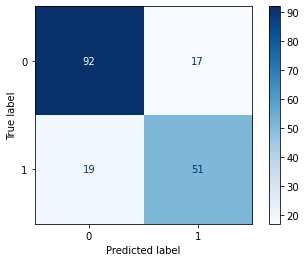

In [ ]:
tree_model = DecisionTreeClassifier() 
tree_model.fit(x_train,y_train)
dtc_predict = tree_model.predict(x_test)
conmatrix_decisintree = plot_confusion_matrix(tree_model, x_test, y_test, cmap = plt.cm.Blues, values_format= 'd') # model worse than log reg.
print(classification_report(dtc_predict, y_test))
print('Training score: ' + str(tree_model.score(x_train, y_train)))
print('Test score: ' + str(tree_model.score(x_test, y_test)))

In [ ]:
model3 = tree_model.fit(x_train, y_train)
print('Training score: ',model3.score(x_train, y_train),)
print('Test score: ', model3.score(x_test, y_test),)

Training score:  0.9831460674157303
Test score:  0.8100558659217877


Training score:  0.9831460674157303
Test score:  0.8268156424581006
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       112
           1       0.76      0.79      0.77        67

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



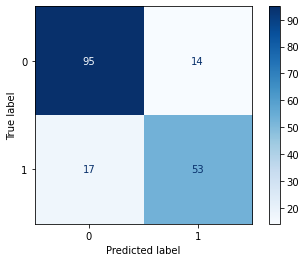

In [ ]:
random_trees = RandomForestClassifier(random_state = 1000) 
model4 = random_trees.fit(x_train,y_train) # fit model to training data and save it to the variable model 4 
rfpred = random_trees.predict(x_test) # make predictions on test data and save them to rfpred
displr = plot_confusion_matrix(random_trees, x_test, y_test ,cmap=plt.cm.Blues , values_format='d') # plot the confusion matrix 
print('Training score: ',model4.score(x_train, y_train))
print('Test score: ', model4.score(x_test, y_test))
print(classification_report(rfpred, y_test))

In [ ]:
print('Classification report for the random forest classifier:')
print('')
print(classification_report(rfpred, y_test))

Classification report for the random forest classifier:

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       112
           1       0.76      0.79      0.77        67

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
df

,Survived,Class,Sex,Age,Fare,Cabin,Embarked,Family_numb,class_embarked
0,0,3,male,22.0,7.2500,NaN,S,1,3S
1,1,1,female,38.0,71.2833,C85,C,1,1C
2,1,3,female,26.0,7.9250,NaN,S,0,3S
3,1,1,female,35.0,53.1000,C123,S,1,1S
4,0,3,male,35.0,8.0500,NaN,S,0,3S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,NaN,Q,5,3Q
886,0,2,male,27.0,13.0000,NaN,S,0,2S
887,1,1,female,19.0,30.0000,B42,S,0,1S
889,1,1,male,26.0,30.0000,C148,C,0,1C


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

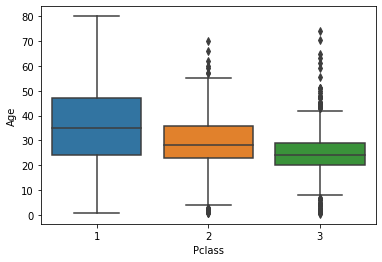

In [ ]:
training_model
sns.boxplot(x = 'Pclass', y = 'Age', data = training_model)

<AxesSubplot:xlabel='Survived', ylabel='count'>

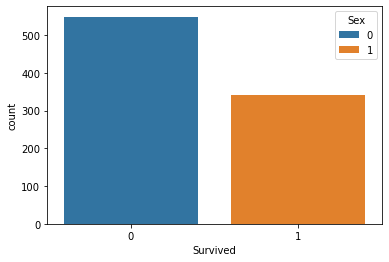

In [ ]:
sns.countplot(x = 'Survived', hue = 'Sex', data = training_model) , # v good to use hue
sns.countplot(x= 'Survived', data = training_model)

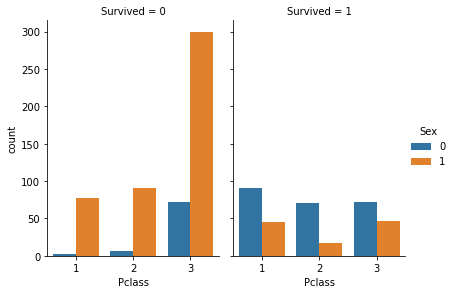

In [ ]:
g = sns.catplot(x="Pclass", hue = 'Sex'  ,col="Survived",
                data=training_model, kind="count",
                height=4, aspect=.7);

In [ ]:
training_model

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,24.0,1,2,23.4500,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
categorical_training = training.copy()
original_encoder = OrdinalEncoder()
s = (training.dtypes == 'object')
cat_cols = list(s[s].index)
print(cat_cols) # will drop ticket and Name. Will use ordinal for embarked only. 


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_training = pd.DataFrame(my_imputer.fit_transform(training))

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Braund, Mr. Owen Harris'

Ok, so now that we have done some data exploration, let us now move onto constructing a model. The target is whether or not the individual survived, and we want to be able to predict this. This is a classification problem, and thus, I believe logistic regression, RandomTrees or Decision Trees, KNNs will work best for this sort of problem. 

In [ ]:
import sklearn as sk  
from sklearn.tree import DecisionTreeClassifier
y = df.Survived
features = ['Age', 'Class']
X = df[features]
X


,Age,Class
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
885,39.0,3
886,27.0,2
887,19.0,1
889,26.0,1


In [ ]:
history_h = pd.DataFrame(training_model.history)

AttributeError: 'DataFrame' object has no attribute 'history'

In [ ]:
df_model = DecisionTreeClassifier(random_state= 0)
df_model.fit(X,y)
df_model.predict(X.head())

array([0, 1, 0, 1, 0])

In [1]:
from sklearn.metrics import mean_absolute_error
predicted = df_model.predict(X)
mean_absolute_error(y, predicted)
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
df_model.fit(train_X, train_y)
val_predictions = df_model.predict(val_X)
mean_absolute_error(val_y, val_predictions)



NameError: name 'df_model' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=0)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

0.4059670914978677
